<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Instagram_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install python3-dev; pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
!sudo apt-get install g++ openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [3]:
import pandas as pd
import numpy as np

In [4]:
from konlpy.tag import Hannanum
import re
from konlpy.tag import Okt 

In [5]:
data = pd.read_csv('./tot_dataset.csv') #데이터셋 로드
data2 = pd.read_csv('./tot_dataset.csv') 

In [6]:
data2.content.loc[data2.name == '평일']

154    ✅ #울산_노아풀빌라..동남아에 놀러온듯...
Name: content, dtype: object

In [7]:
data.info() #데이터셋 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  609 non-null    int64 
 1   content     609 non-null    object
 2   date        609 non-null    object
 3   like        609 non-null    int64 
 4   tags        609 non-null    object
 5   name        609 non-null    object
 6   overlap     609 non-null    int64 
 7   place       248 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.2+ KB


In [8]:
data.head()

,Unnamed: 0,content,date,like,tags,name,overlap,place
0,0,"속초_파도의무늬오션뷰 감성 에어비앤비""파도의무늬""'파도의무늬'는물결이 일렁이고 윤슬...",2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1,"강릉_스테이 시호일시간의 흔적을 담은 감성숙소""스테이 시호일""'스테이 시호일'은60...",2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2,"제주_까만돌멩이구좌읍 조식주는 예쁜 숙소""까만돌멩이""'까만돌멩이'는가족 및 커플 또...",2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3,"단양_권장사양인스타감성 가득한 독채 숙소""권장사양""'권장사양'은 자연경관으로 둘러쌓...",2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4,"강릉_라온가따뜻한 느낌의 힐링 감성숙소""라온가""'라온가'는 주택을 개조한 숙소이며'...",2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN


In [9]:
data.nlargest(20, 'overlap') #중복콘텐츠 확인

,Unnamed: 0,content,date,like,tags,name,overlap,place
424,424,#거제_디스커버리풀빌라거제 위치한 전객실 오션뷰 숙소 '디스커버리풀빌라'객실에 들어...,2021-06-12,12784,"['#거제_디스커버리풀빌라거제', '#감성비앤비🏷거제로', '#감성비앤비_거제사진출...",디스커버리풀빌라,8,경상남도 거제시 장목면 옥포대첩로 1248 디스커버리풀빌라
404,404,#제주_오오오하우스제주 서쪽 한경면의 조용하고 한적한 동네에 위치하고있는 '오오오하...,2021-08-01,1573,"['#제주_오오오하우스제주', '#감성비앤비🏷제주로', '#감성비앤비_제주사진출처:...",오오오하우스,6,제주특별자치도 제주시 한경면 대한로 800-12
416,416,#남해_적정온도남해 서면에 위치하고 있는 노천과 수영을 함께 즐길 수 있는 아름다운...,2021-07-05,1382,"['#남해_적정온도남해', '#감성비앤비🏷남해로', '#감성비앤비_남해사진출처:',...",적정온도,6,NaN
435,435,#삼척_사유의숲강원도 삼척에 위치한 신상 독채 풀빌라 '사유의숲' '사유의숲'은 발...,2021-05-15,7465,"['#삼척_사유의숲강원도', '#감성비앤비🏷강원도로', '#감성비앤비_삼척사진출처'...",사유의숲,6,강원도 삼척시 뒷나루길 276-5
374,374,"통영_맘마논맘마자연의 쉼을 당신에게""맘마논맘마""맘마논맘마는 아침에는 바다위로해가 떠...",2021-08-31,2561,"['#데일리감성통영으로', '#데일리감성_통영경상남도도', '#데일리감성_경남———...",맘마논맘마,5,경상남도 통영시 용남면 용남해안로 230
406,406,#양평_책속에풍덩경기도 양평에 위치하고있는 넓은 객실과 수영장을 함께 이용할 수 있...,2021-07-28,1966,"['#양평_책속에풍덩경기도', '#감성비앤비🏷양평으로', '#감성비앤비_양평사진출처...",책속에풍덩,5,경기도 양평군 용문면 중원산로 518-9
426,426,#경주_아나톨리아경주에 위치하고있는 푸른 동해바다로 둘러싸인 실내 풀빌라숙소 '아나...,2021-06-05,6805,"['#경주_아나톨리아경주에', '#감성비앤비🏷경주로', '#감성비앤비_경주사진출처:...",아나톨리아,5,NaN
445,445,#공주_소소아한옥충남 공주에 위치하고있는 독채 한옥숙소 '소소아한옥'소소아한옥은 총...,2021-04-19,1668,"['#공주_소소아한옥충남', '#감성비앤비🏷공주로', '#감성비앤비_공주사진출처',...",소소아한옥,5,NaN
473,473,#순천_화담별서전남 순천에 위치하고있는 '화담별서' 화담별서는 정답게 마주하고 행복...,2021-02-14,2410,"['#순천_화담별서전남', '#감성비앤비🏷순천으로', '#감성비앤비_순천사진출처',...",화담별서,5,전라남도 순천시 별량면 우산간동길 65
562,562,✅ #홍천_올라운드원조용한 숲 속에 자리잡은 외국 갤러리 같은 둥근 공간 안에 모던...,2021-08-18,3053,"['#홍천_올라운드원조용한', '#감성숙소_홍천✔', '#감성숙소_강원도📍올라운드원...",올라운드원,5,경기도 양평군 단월면 대부록길 38-1


In [10]:
data.overlap.value_counts() # 중복값 counts 확인

1    363
2    146
3     60
4     30
5      6
6      3
8      1
Name: overlap, dtype: int64

#토큰화

In [11]:
hannanum = Hannanum()
okt = Okt()

In [12]:
data = data[['name','content']] #데이터셋 재구성

In [13]:
#"""한글빼고 전부 제거"""
# def sub_special(s):
#   return re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]','',s)

In [14]:
# sub_special(data['content'])

In [15]:
stop_words = '의 가 이 은 들 는 좀 잘 걍 과 도 달리 스럽다 특별자치도 를 으로 자 에 와 한 하다 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 체크 체크아웃 가격 정보 비 수기 평일 기준 약 전국  예약 되어다 스마트 빔 블루투스 스피커 이 외 드라이어 다리미 구비 되어다 있다 주방 음식 조리 가능하다 환기 제한 있다 냄새 나 요리 삼가다 부탁드리다 후 다 가격 수기 비성수기 주소  좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 수 약 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓' #불용어 리스트 형성

In [16]:
stop_words=stop_words.split(' ')

In [17]:
text_okt = data.content[0]

In [18]:
text_okt

'속초_파도의무늬오션뷰 감성 에어비앤비"파도의무늬"\'파도의무늬\'는물결이 일렁이고 윤슬이 반짝거리며파도가 철썩철썩 치는다양한 모습의 파도의 무늬를 즐길 수 있어요.들려오는 시원한 파도소리를가만히 눈을 감고 듣다보면많은 생각과 많은 계획을 잠시 내려두고느긋하게 머리를 식힐 수 있어요 :)숙소 내부는세개의 창으로 엿보이는 푸른 파도의 무늬와오후부터 저녁까지 긴 시간 들어오는따뜻한 영랑호의 햇살까지 그대로 담은 공간으로바다가 보이는 오션뷰에요 :)객실과 욕실, 주방으로 분리되어있고스마트빔과 블루투스 스피커 이 외에도드라이어와 다리미도 구비되어 있어요.주방에서 음식 조리가 가능하지만환기에 제한이 있어냄새가 많이 나는 요리는 삼가 부탁드려요 :)눈을 감고 파도의 소리를 들으며안티 스트레스 티와 함께 복잡한 마음을 해소해보세요.—————————————————🏡\'속초 파도의무늬\'🚩주소👉강원도 속초시👉정확한 주소는 예약 후 표시📆예약문의airbnb.co.kr/rooms/43537659⏰체크인 : PM 16:00⏰체크아웃 : PM 12:00📍가격정보👉비수기 평일 기준 약 170,000📸Photo by @hyoyonee @kimssoyeoni @seony5h전국 감성숙소는 #데일리감성속초로 떠난다면 #데일리감성_속초강원도 여행은 #데일리감성_강원—————————————————'

In [19]:
def tokenize(text) : #토큰화 명사 동사 형용사만 추출
    result = []
    word_s = okt.pos(text, norm=True, stem=True)
    for n, h in word_s :
        if not (h in ['Noun', 'Verb', 'Adjective']) : continue
        result.append(n)
    return result

In [20]:
token_okt = tokenize(text_okt)

##불용어제거

In [21]:
result = [] #불용어제거
for w in token_okt: 
    if w not in stop_words: 
        result.append(w)

# print(text_okt,'\n')
print(result)

['속초', '파도', '무늬', '오션', '뷰', '감성', '에어비앤비', '파도', '무늬', '파도', '무늬', '늘다', '물결', '일렁', '윤슬', '반짝거리다', '파도', '철썩', '철썩', '치다', '다양하다', '모습', '파도', '무늬', '즐기다', '들려오다', '시원하다', '파도', '소리', '눈', '감고', '듣다', '보다', '많다', '많다', '계획', '내다', '두다', '느긋하다', '머리', '식히다', '숙소', '내부', '세', '창', '푸른', '파도', '무늬', '오후', '저녁', '기다', '들어오다', '따뜻하다', '호의', '햇살', '그대로', '담다', '공간', '바다', '보이다', '오션', '뷰', '객실', '욕실', '분리', '눈', '감고', '파도', '소리', '들다', '안티', '스트레스', '티', '복잡하다', '마음', '해소', '해보다', '속초', '파도', '무늬', '강원도', '속초시', '정확하다', '표시', '감성', '숙소', '떠나다', '여행']


## 불용어+토큰화 컬럼 생성

In [22]:
data['token_content'] = np.NaN

In [23]:
for i in range(len(data.content)):
  data.content[i] = tokenize(data.content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
for i in range(len(data.content)):
  result = []
  for w in data.content[i]:
    if w not in stop_words:
      result.append(w)
    data.token_content[i] = result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [25]:
data.loc[data.name == '평일']

,name,content,token_content
154,평일,"[평일, 호, 비, 수기, 기준]",[호]


In [26]:
data['token_nolist'] = np.NaN

In [27]:
for i in range(len(data)):
  data.token_nolist[i] = " ".join(data.token_content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
" ".join(data.token_content[0])

'속초 파도 무늬 오션 뷰 감성 에어비앤비 파도 무늬 파도 무늬 늘다 물결 일렁 윤슬 반짝거리다 파도 철썩 철썩 치다 다양하다 모습 파도 무늬 즐기다 들려오다 시원하다 파도 소리 눈 감고 듣다 보다 많다 많다 계획 내다 두다 느긋하다 머리 식히다 숙소 내부 세 창 푸른 파도 무늬 오후 저녁 기다 들어오다 따뜻하다 호의 햇살 그대로 담다 공간 바다 보이다 오션 뷰 객실 욕실 분리 눈 감고 파도 소리 들다 안티 스트레스 티 복잡하다 마음 해소 해보다 속초 파도 무늬 강원도 속초시 정확하다 표시 감성 숙소 떠나다 여행'

#TF-IDF 벡터화

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
test = data.token_nolist

In [31]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(test)
# 줄거리에 대해서 tf-idf 수행
print(tfidf_matrix.shape)

(609, 5454)


## 코사인 유사도 행렬 생성

In [32]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [33]:
cosine_sim

array([[1.        , 0.01725934, 0.00935047, ..., 0.01185352, 0.00875413,
        0.02542871],
       [0.01725934, 1.        , 0.01580191, ..., 0.04846655, 0.13623104,
        0.0174113 ],
       [0.00935047, 0.01580191, 1.        , ..., 0.0124695 , 0.0137301 ,
        0.08678096],
       ...,
       [0.01185352, 0.04846655, 0.0124695 , ..., 1.        , 0.094277  ,
        0.1116302 ],
       [0.00875413, 0.13623104, 0.0137301 , ..., 0.094277  , 1.        ,
        0.11184618],
       [0.02542871, 0.0174113 , 0.08678096, ..., 0.1116302 , 0.11184618,
        1.        ]])

In [34]:
##인덱스 테이블 만들기##
indices = pd.Series(data.index, index=data.name).drop_duplicates()
print(indices)

name
파도의무늬         0
스테이 시호일       1
까만돌멩이         2
권장사양          3
라온가           4
           ... 
솔트          604
피그멜리온이펙트    605
품안의밤        606
더브리앙뜨       607
한라궁호텔       608
Length: 609, dtype: int64


## 유사 아이템 검색

In [35]:
def insta_REC(name, cosine_sim=cosine_sim):
    #입력한 숙소로부터 인덱스 가져오기
    idx = indices[name]

    # 모든 숙소에 대해서 해당 숙소와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 숙소들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)

    # 가장 유사한 10개의 숙소를 받아옴
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개 숙소의 인덱스 받아옴
    insta_indices = [i[0] for i in sim_scores]
    
    #기존에 읽어들인 데이터에서 해당 인덱스의 값들을 가져온다. 그리고 스코어 열을 추가하여 코사인 유사도도 확인할 수 있게 한다.
    result_data = data.iloc[insta_indices].copy()
    result_data['score'] = [i[1] for i in sim_scores]
    
    # 읽어들인 데이터에서 줄거리 부분만 제거, 제목과 스코어만 보이게 함
    del result_data['content']

    # 가장 유사한 10개의 숙소의 제목을 리턴
    return result_data

In [36]:
insta_REC('황남채')

,name,token_content,token_nolist,score
589,담안,"[담장, 경주, 매력, 가득, 담다, 경주, 옥, 형태, 기와, 지붕, 그대로, 깔...",담장 경주 매력 가득 담다 경주 옥 형태 기와 지붕 그대로 깔끔하다 모던 함 자체 ...,0.313224
510,소이한옥,"[천년, 역사, 자랑, 경주, 황리, 달다, 위치, 옥, 게스트하우스, 운영, 공간...",천년 역사 자랑 경주 황리 달다 위치 옥 게스트하우스 운영 공간 주인 감성 담다 리...,0.312723
531,소설재,"[천년, 역사, 문화, 날수, 경주, 전통문화, 그대로, 누리다, 소설, 재, 옥,...",천년 역사 문화 날수 경주 전통문화 그대로 누리다 소설 재 옥 리 모델링 황리 단점...,0.295000
459,웨이트리펜션,"[위치, 동해, 바다, 담다, 오션, 뷰펜션, 웨이, 트리, 펜션, 패밀리, 객실,...",위치 동해 바다 담다 오션 뷰펜션 웨이 트리 펜션 패밀리 객실 제외 객실 감포 해변...,0.258328
391,소소정,"[황리, 달다, 중심, 위치, 따뜻하다, 스파, 즐기다, 옥, 분위기, 잔뜩, 느끼...",황리 달다 중심 위치 따뜻하다 스파 즐기다 옥 분위기 잔뜩 느끼다 옥 스테이 소정 ...,0.251997
580,루트,"[경주, 골동, 숨다, 국적, 공간, 경북, 경주시, 마동, 크다, 마을, 길, 박...",경주 골동 숨다 국적 공간 경북 경주시 마동 크다 마을 길 박 인기 준 화이트 블루...,0.247301
354,더케이호텔경주,"[황룡, 뷰, 볼, 경주, 숙소, 케이, 호텔, 경주, 이다, 케이, 호텔, 경주,...",황룡 뷰 볼 경주 숙소 케이 호텔 경주 이다 케이 호텔 경주 보문 위치 첨성대 불국...,0.246606
442,빌라그레이스,"[건축가, 부부, 지은, 디자인, 감성, 숙소, 경주, 빌라, 그레이스, 총, 동,...",건축가 부부 지은 디자인 감성 숙소 경주 빌라 그레이스 총 동 구성 돼다 동 제외 ...,0.242042
415,소소한옥,"[황리, 달다, 근처, 위치, 독채, 옥, 숙소, 소소하다, 옥, 지다, 옥, 리,...",황리 달다 근처 위치 독채 옥 숙소 소소하다 옥 지다 옥 리 모델링 곳 옥 가지다 ...,0.237197
377,유온스테이,"[경주, 유온, 스테이, 넉, 느낌, 경주, 감성, 숙소, 유온, 스테이, 경주, ...",경주 유온 스테이 넉 느낌 경주 감성 숙소 유온 스테이 경주 유온 스테이 숙소 시설...,0.229624


# 클러스터링

In [37]:
data

,name,content,token_content,token_nolist
0,파도의무늬,"[속초, 파도, 무늬, 오션, 뷰, 감성, 에어비앤비, 파도, 무늬, 파도, 무늬,...","[속초, 파도, 무늬, 오션, 뷰, 감성, 에어비앤비, 파도, 무늬, 파도, 무늬,...",속초 파도 무늬 오션 뷰 감성 에어비앤비 파도 무늬 파도 무늬 늘다 물결 일렁 윤슬...
1,스테이 시호일,"[강릉, 스테이, 호일, 시간, 흔적, 담다, 감성, 숙소, 스테이, 호일, 스테이...","[강릉, 스테이, 호일, 흔적, 담다, 감성, 숙소, 스테이, 호일, 스테이, 호일...",강릉 스테이 호일 흔적 담다 감성 숙소 스테이 호일 스테이 호일 강릉 번화가 유명하...
2,까만돌멩이,"[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...","[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...",제주 까맣다 돌멩이 구좌읍 식주 예쁘다 숙소 까맣다 돌멩이 까맣다 돌멩이 는가 족 ...
3,권장사양,"[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...","[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...",단양 권장 사양 인스타 감성 가득하다 독채 숙소 권장 사양 권장 사양 자연 경관 둘...
4,라온가,"[강릉, 온, 따뜻하다, 느낌, 힐링, 감성, 숙소, 라오, 라오, 늘다, 주택, ...","[강릉, 온, 따뜻하다, 느낌, 힐링, 감성, 숙소, 라오, 라오, 늘다, 주택, ...",강릉 온 따뜻하다 느낌 힐링 감성 숙소 라오 라오 늘다 주택 개조 숙소 온 순 우리...
...,...,...,...,...
604,솔트,"[하다, 폭, 그림, 같다, 오션, 뷰, 제주, 액자, 창문, 너머, 보이다, 바다...","[폭, 그림, 오션, 뷰, 제주, 액자, 창문, 너머, 보이다, 바다, 보고, 가다...",폭 그림 오션 뷰 제주 액자 창문 너머 보이다 바다 보고 가다 모르다 감성 숙소 랍...
605,피그멜리온이펙트,"[통창, 리버, 뷰, 환상, 춘천, 피그, 메다, 온, 펙트, 리버, 마운틴뷰, 보...","[통창, 리버, 뷰, 환상, 춘천, 피그, 메다, 온, 펙트, 리버, 마운틴뷰, 보...",통창 리버 뷰 환상 춘천 피그 메다 온 펙트 리버 마운틴뷰 보다 월풀 스파 즐기다 ...
606,품안의밤,"[작다, 시골, 동네, 안, 위치, 붓, 편안하다, 감성, 숙소, 곡성, 품다, 밤...","[작다, 시골, 동네, 위치, 붓, 편안하다, 감성, 숙소, 곡성, 품다, 밤, 논...",작다 시골 동네 위치 붓 편안하다 감성 숙소 곡성 품다 밤 논밭 뷰 보다 여유 만끽...
607,더브리앙뜨,"[방송, 돼다, 하다, 번, 다녀오다, 의, 웨딩촬영, 지로, 유명하다, 강릉, 더...","[방송, 돼다, 다녀오다, 웨딩촬영, 지로, 유명하다, 강릉, 브리앙, 뜨다, 화이...",방송 돼다 다녀오다 웨딩촬영 지로 유명하다 강릉 브리앙 뜨다 화이트 앤 우드 톤 좋...


## Word2Vec embedding

In [38]:
# Word2Vec embedding
from gensim.models import Word2Vec

In [39]:
GPU = True
if GPU: # GPU
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)
    #np.add.at = np.scatter_add

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else :
    import numpy as np

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [40]:
data.token_content.values

array([list(['속초', '파도', '무늬', '오션', '뷰', '감성', '에어비앤비', '파도', '무늬', '파도', '무늬', '늘다', '물결', '일렁', '윤슬', '반짝거리다', '파도', '철썩', '철썩', '치다', '다양하다', '모습', '파도', '무늬', '즐기다', '들려오다', '시원하다', '파도', '소리', '눈', '감고', '듣다', '보다', '많다', '많다', '계획', '내다', '두다', '느긋하다', '머리', '식히다', '숙소', '내부', '세', '창', '푸른', '파도', '무늬', '오후', '저녁', '기다', '들어오다', '따뜻하다', '호의', '햇살', '그대로', '담다', '공간', '바다', '보이다', '오션', '뷰', '객실', '욕실', '분리', '눈', '감고', '파도', '소리', '들다', '안티', '스트레스', '티', '복잡하다', '마음', '해소', '해보다', '속초', '파도', '무늬', '강원도', '속초시', '정확하다', '표시', '감성', '숙소', '떠나다', '여행']),
       list(['강릉', '스테이', '호일', '흔적', '담다', '감성', '숙소', '스테이', '호일', '스테이', '호일', '강릉', '번화가', '유명하다', '남문', '위치', '흔적', '품다', '주택', '상점', '많다', '동네', '상점', '주택가', '만나다', '지점', '조용하다', '자리', '오래되다', '주택', '형태', '유지', '내부', '미니', '멀다', '베이스', '빈티', '요소', '입히다', '호일', '독특하다', '분위기', '느끼다', '대관령', '물줄기', '바다', '흘러가다', '남대천', '계곡', '내려오다', '물고기', '바다', '밀려오다', '물고기', '새', '눈', '볼', '따스하다', '아침', '햇살', '맞다', '일어나다', '남대천', '따르다', '산책

In [41]:
embedding_model = Word2Vec(data.token_content, size=100, window = 2, min_count=10, workers=4, iter=100, sg=1)

In [42]:
embedding_model

In [43]:
# print(embedding_model.most_similar(positive=["제주"], topn=100))

### 문장 벡터

In [44]:
a = [1,2,3,4,5]

In [45]:
len(a)

5

In [46]:
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(embedding_model.wv[i])
        except KeyError as e:
            pass
    try:
        return sum(vector)/len(vector)
    except IndexError as e:
        pass

In [47]:
data['wv'] = data['token_content'].map(get_sentence_mean_vector)

In [48]:
embedding_model.wv

In [49]:
data['wv'][0]

array([ 0.18031251,  0.00656592,  0.05498236, -0.09924239, -0.11706337,
        0.10494121,  0.18675879, -0.17680052,  0.22977644, -0.28377658,
        0.14171128,  0.14169343,  0.13318005, -0.0014473 , -0.27127513,
        0.26409203, -0.05304047,  0.03110127,  0.3826162 ,  0.05849478,
       -0.03148306,  0.34649104,  0.04333645, -0.20577414, -0.10181989,
        0.11656475,  0.00431915, -0.06029555,  0.09683967, -0.07835717,
        0.01427063,  0.32360455,  0.08486851,  0.09629539, -0.38558406,
        0.17463365,  0.22079097, -0.3707249 , -0.07027875, -0.27437076,
        0.15087807,  0.18590048, -0.5417011 ,  0.09837352,  0.17785865,
       -0.03267221, -0.00810514,  0.05939816,  0.06440597,  0.31478572,
       -0.17743383, -0.0992168 , -0.41081998,  0.5723166 , -0.01883838,
       -0.13942137, -0.01867071,  0.07488775, -0.20930894,  0.43629423,
       -0.0184801 , -0.00230279, -0.39245552,  0.23949055,  0.17335206,
       -0.02183961,  0.16562279, -0.00875793, -0.4000621 ,  0.14

# K-Means 어휘 클러스터링

In [50]:
from sklearn.cluster import KMeans

word_vectors = embedding_model.wv.syn0 # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50) # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = embedding_model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [52]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['책', '읽다', '서재']

cluster 1
['층', '야외', '넓다', '침실', '거실', '마당', '작다', '방', '햇살', '창', '크다', '테라스', '통창', '다양하다', '구성', '욕조', '룸', '들어오다', '포근하다', '침대', '앉다', '실내', '복층', '창문', '그림', '전체', '마련', '자다', '밖', '탑', '루프', '구조', '욕실', '건물', '화장실', '프로젝터', '통', '영화', '통해', '포인트', '테이블', '열다', '나다', '높다', '욕', '프로젝트', '다락방', '유리', '채다', '문', '유리창', '외부', '크게', '향', '다이닝룸', '형태', '마루', '올라가다', '반기다', '계단', '낮다', '아담하다', '방이', '분리', '베드', '부엌', '서든', '옥상', '원룸', '따다', '하이라이트', '해먹', '겸', '의자', '연결', '채광', '다르다', '중정', '크기', '본채', '앞마당', '뒷마당', '식탁', '타고', '온실', '쇼파', '툇마루', '그네', '원형', '평상', '액자', '찍', '샤워', '족욕', '모양', '쪽', '메인', '온돌방', '대청', '벽난로', '바깥채', '컬러', '잡고', '개방', '방과', '구분', '용공', '각기', '잠들다']

cluster 2
['인테리어', '톤', '꾸미다', '화이트', '깔끔하다', '소품', '내부', '우드', '아기자기하다', '곳곳', '사장', '어우러지다', '취향', '감각', '모던', '조명', '해외', '외관', '빈티', '함', '돋보이다', '가구', '만들어지다', '놓이다', '개다', '미니', '호스트', '앤', '센스', '끄다', '조화롭다', '독특하다', '찍기', '색감', '멀다', '스타', '조합', '디자인', '즐겁다', '성', '부부', '깨끗하

- word2vec을 100차원으로 했기 때문에 시각화를 위해서 2차원으로 축소,
- 축소할 때 관계를 유지하기 위해 t-SNE로 transform

In [53]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# path_gothic = "/home/ururu/fonts/NanumGothic.ttf"
# prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [54]:
vocab = list(embedding_model.wv.vocab)
X = embedding_model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [55]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

In [56]:
df.head()

,x,y
속초,-12.338897,-7.666074
파도,35.930817,20.344057
오션,2.432848,-4.858544
뷰,8.164875,2.059552
감성,-7.441114,2.955127


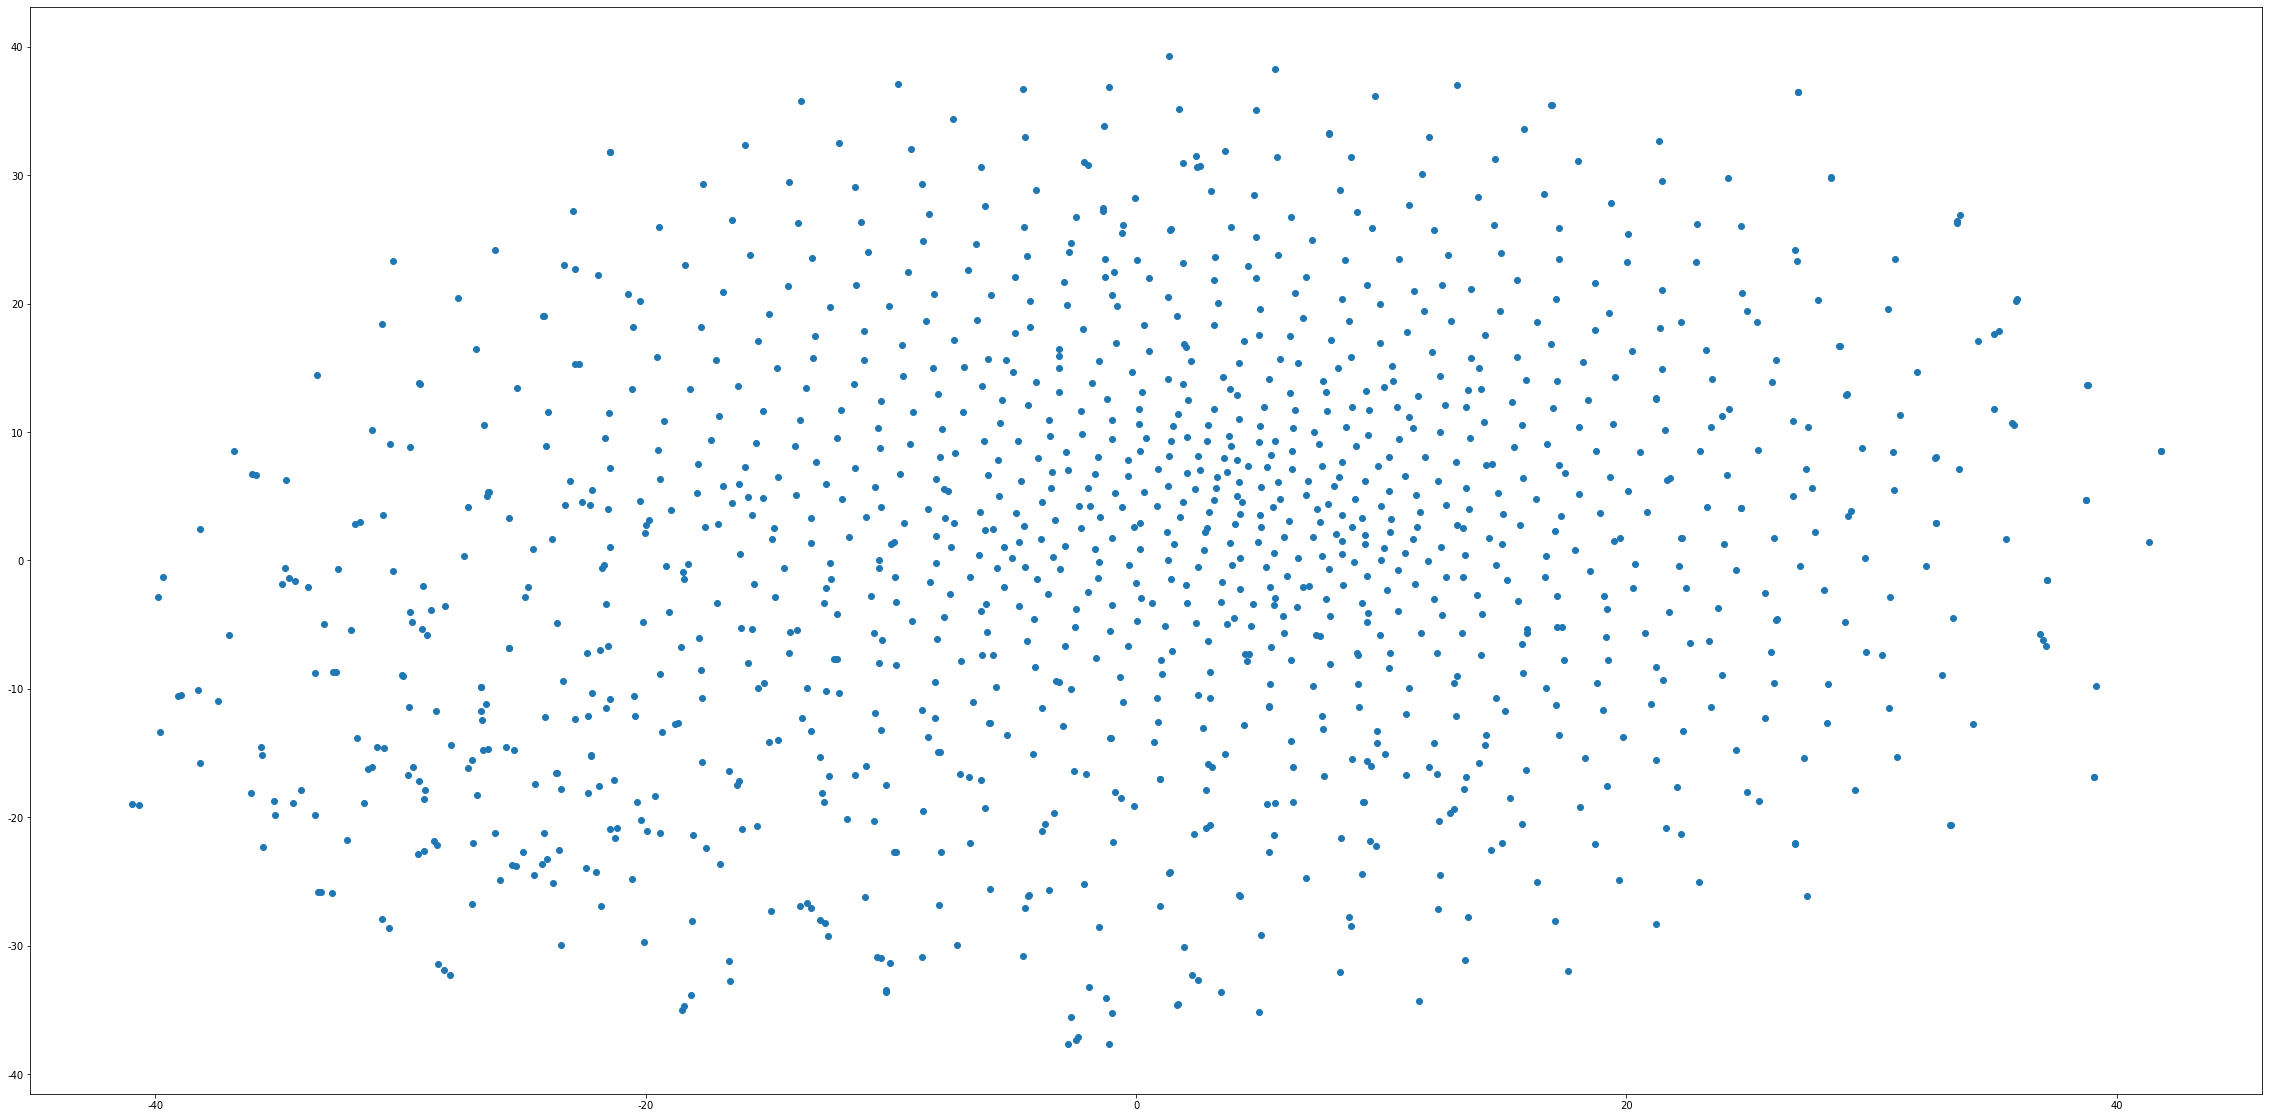

In [57]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

# for word, pos in list(df.iterrows()):
#     ax.annotate(word, pos, fontsize=12)
plt.show()

# 문장 클러스터링 - 어휘 벡터 평균 활용

In [58]:
from sklearn.cluster import KMeans
import time

word_vectors = data['wv'].to_list() 
num_clusters = 10

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )
data['category'] = idx

In [59]:
data.loc[data.category == 5]

,name,content,token_content,token_nolist,wv,category
2,까만돌멩이,"[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...","[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...",제주 까맣다 돌멩이 구좌읍 식주 예쁘다 숙소 까맣다 돌멩이 까맣다 돌멩이 는가 족 ...,"[0.16441333, 0.279764, -0.039880257, 0.1238291...",5
3,권장사양,"[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...","[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...",단양 권장 사양 인스타 감성 가득하다 독채 숙소 권장 사양 권장 사양 자연 경관 둘...,"[0.31786126, 0.20670103, -0.11282189, 0.020639...",5
7,하도리보통날,"[제주, 하다, 보통, 날, 돌담, 예쁘다, 제주, 감성, 스테이, 하다, 보통, ...","[제주, 보통, 날, 돌담, 예쁘다, 제주, 감성, 스테이, 보통, 날, 보통, 날...",제주 보통 날 돌담 예쁘다 제주 감성 스테이 보통 날 보통 날 사장 여행 오다 특별...,"[0.07755961, 0.33260882, -0.02651524, 0.158076...",5
9,여전히제주,"[제주, 여전하다, 제주, 동쪽, 감성, 숙소, 여전하다, 제주, 여전하다, 제주,...","[제주, 여전하다, 제주, 동쪽, 감성, 숙소, 여전하다, 제주, 여전하다, 제주,...",제주 여전하다 제주 동쪽 감성 숙소 여전하다 제주 여전하다 제주 숙소 동 운영 프라...,"[0.13489503, 0.23852326, -0.031255767, 0.04636...",5
14,무무라,"[향기, 가득하다, 힐링, 공간, 무무, 물이, 졸졸, 흐르다, 바람, 솔솔, 불,...","[향기, 가득하다, 힐링, 공간, 무무, 물이, 흐르다, 바람, 솔솔, 불, 나뭇잎...",향기 가득하다 힐링 공간 무무 물이 흐르다 바람 솔솔 불 나뭇잎 하늘거리다 자연 향...,"[0.1280808, 0.29650572, -0.067073636, 0.056336...",5
...,...,...,...,...,...,...
530,헤이,"[순천역, 멀다, 않다, 위치, 조용하다, 롯, 우리, 즐기다, 있다, 독채, 감성...","[순천역, 멀다, 위치, 조용하다, 롯, 즐기다, 독채, 감성, 숙소, 헤이, 입구...",순천역 멀다 위치 조용하다 롯 즐기다 독채 감성 숙소 헤이 입구 모든 층 유럽 꾸미...,"[0.11975286, 0.30676645, -0.05414556, -0.07918...",5
568,제주,"[근처, 위치, 하다, 확, 트이다, 통창, 제주, 감성, 물씬, 느끼다, 있다, ...","[근처, 위치, 확, 트이다, 통창, 제주, 감성, 물씬, 느끼다, 돌담, 갈대, ...",근처 위치 확 트이다 통창 제주 감성 물씬 느끼다 돌담 갈대 풍력 발전기 바다 보이...,"[0.09848593, 0.24425817, -0.0044043474, -0.049...",5
572,멜로우멘션,"[강화도, 감성, 숙소, 인천, 강화군, 내가면, 비고, 보다, 예약, 및, 가격,...","[강화도, 감성, 숙소, 인천, 강화군, 내가면, 비고, 보다, 채팅, 문의, 님,...",강화도 감성 숙소 인천 강화군 내가면 비고 보다 채팅 문의 님 강화도 새롭다 오픈 ...,"[0.14178216, 0.20464696, -0.094297744, 0.06125...",5
574,달리야드,"[제주, 달리, 아름답다, 정원, 제주, 서귀포시, 성산읍, 달리, 박, 인기, 준...","[제주, 아름답다, 정원, 제주, 서귀포시, 성산읍, 박, 인기, 준, 위치, 아름...",제주 아름답다 정원 제주 서귀포시 성산읍 박 인기 준 위치 아름답다 정원 제주 감성...,"[0.050711907, 0.28663054, -0.025317093, 0.0742...",5


In [60]:
from sklearn.manifold import TSNE

X = data['wv'].to_list()
y = data['category'].to_list()

import os.path
import pickle

tsne_filepath = 'tsne3000.pkl'

# File Cache
if not os.path.exists(tsne_filepath):
    tsne = TSNE(random_state=42)
    tsne_points = tsne.fit_transform(X)
    with open(tsne_filepath, 'wb+') as f:
        pickle.dump(tsne_points, f)
else: # Cache Hits!
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)

tsne_df = pd.DataFrame(tsne_points, index=range(len(X)), columns=['x_coord', 'y_coord'])
tsne_df['item_name'] = data['name'].to_list()
tsne_df['item_content'] = data['token_content'].to_list()
tsne_df['cluster_no'] = y

In [61]:
tsne_df.sample(3)

,x_coord,y_coord,item_name,item_content,cluster_no
50,17.492620,1.541114,달하우스,"[밀양, 위치, 조용하다, 시골, 마을, 내려다보다, 달하우스, 달하우스, 늘다, ...",3
223,-10.696076,-5.085169,안녕김녕,"[제주, 김녕, 오션, 뷰, 숙소, 제주, 구좌읍, 좌, 해안로, 박, 하루, 종일...",2
173,-0.042807,2.565305,헤이춘천,"[춘천, 곳, 숙박, 플랫폼, 선두, 주자, 놀다, 신규, 라이프스타일, 브랜드, ...",1


##Bokeh로 2차원 Plotting

In [62]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import brewer

output_notebook()

- 10개의 클러스터에 컬러 생성

In [63]:
# Get the number of colors we'll need for the plot.
colors = brewer["Spectral"][len(tsne_df['cluster_no'].unique())]

# Create a map between factor and color.
colormap = {i: colors[i] for i in tsne_df['cluster_no'].unique()}

# Create a list of colors for each value that we will be looking at.
colors = [colormap[x] for x in tsne_df['cluster_no']]

tsne_df['color'] = colors

- 이후 Bokeh가 인식하는 DataSource 객체를 만들어준다.


In [64]:
# Bokeh Datasouce 만들기
plot_data = ColumnDataSource(
    data=tsne_df.to_dict(orient='list')
)


- 그리고 실제 Plot을 그리기 위한 배경으로 650x650 사이즈의 공간을 만들어준다.

In [65]:
# Plot 만들기(배경)
tsne_plot = figure(
    title='TSNE item_content Embeddings',
    plot_width = 650,
    plot_height = 650,
    active_scroll='wheel_zoom',
    output_backend="webgl",
)

- 툴팁 생성

In [66]:
# 해당 Hover 툴팁 만들기
tsne_plot.add_tools(
    HoverTool(
        tooltips='@item_name' + '@cluster_no'
    )
)

- 데이터 입력

In [67]:
tsne_plot.circle(
    source=plot_data,
    x='x_coord',
    y='y_coord',
    line_alpha=0.3, 
    fill_alpha=0.2,
    size=10,
    fill_color='color',
    line_color='color',
)

GlyphRenderer(id='1041', ...)

In [68]:
# 각 값들 추가해주기 
tsne_plot.title.text_font_size = '12pt'
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# 짠!
show(tsne_plot)

### 클러스터별 정보 보기

In [69]:
data[
     data['category'] == 0
][['name','token_content', 'category']].head(10)

,name,token_content,category
8,스테이와봄,"[양양, 스테이, 봄, 양양, 프라이, 빗, 감성, 숙소, 스테이, 봄, 스테이, ...",0
88,팔로우,"[많다, 관심, 덕분, 기념, 돌아오다, 감성, 비앤비, 이벤, 트이다, 진심, 감...",0
200,더무빙,"[부산, 기장, 캠핑, 카라반, 더무빙, 포토, 존, 많다, 캠핑, 연인, 친구, ...",0
256,해와달글램핑,"[물, 위, 바베큐, 힐링, 낚시, 포천, 잔잔하다, 호수, 위로, 저물다, 해, ...",0
267,메종드유유,"[노을, 맛집, 고요, 그물, 눕다, 보고, 수영, 보고, 유니크, 독채, 펜션, ...",0
273,두번째벚꽃,"[초록빛, 넘치다, 숲, 가운데, 편안하다, 쉬다, 터, 싱그럽다, 녹차, 밭, 보...",0
277,수영장숙소,"[프라이, 빗, 시원하다, 여름, 보내다, 모음, 곳, 각지, 수영장, 숙소, 살펴...",0
285,오월의정원,"[호수, 뷰, 프라이, 빗, 스파, 즐기다, 강릉, 오월, 의정원, 예쁘다, 정원,...",0
288,호수의하루,"[대청호, 호수, 뷰, 휴식, 하루, 보내다, 대전, 호수, 하루, 초록, 초록, ...",0
289,협재,"[제주, 협재해수욕장, 위치, 협재, 자형, 태의, 프라이, 빗, 오션, 뷰, 독채...",0


# 문장 클러스터링 - Doc2Vec 활용